In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import animation as animation

import seaborn as sns

sns.set(font_scale=1.6, palette='RdBu')

# Методы оптимизации

Методы оптимизации широко используются в анализе данных и машинном обучении. Например, они применяются при обучении линейной регрессии с **lasso** или **elastic net** регуляризацией. Кроме того, на оптимизации функции потерь основано обучение любых нейронных сетей. Поэтому каждый, кто планирует заниматься анализом данных, должен знать основные методы оптимизации.

**Базовые элементы оптимизации.**

* Переменные &mdash; параметры, по которым требуется оптимизировать функцию.

* Ограничения &mdash; границы, в которых могут варьироваться переменные.

* Функция потерь &mdash; функция, которую минимизирует метод.

Постановка задачи оптимизации &mdash; определение функции потерь и переменных, по которым будет минимизироваться функция потерь и ограничений на эти переменные.

## 1. Основные методы оптимизации.

Пусть задача оптимизации имеет вид $f(\theta) \to \min_\theta$, и $\nabla_{\theta} f(\theta)$ &mdash; градиент функции $f(\theta)$.

Все методы, рассматриваемые здесь, являются итеративными. Они последовательно приближают текущее значение параметра $\theta$ к оптимальному $\theta^*$.

О некоторых других продвинутых методах вы узнаете в разделе курса, посвященном нейросетям.

### 1.1. Градиентный спуск (GD &mdash; Gradient Descent)

$$\theta_{t+1} = \theta_t - \eta \nabla_{\theta} f(\theta_t).$$

Здесь изменение параметра $\theta$ происходит по направлению антиградиента. Метод градиентного спуска основан на том факте, что антиградиент &mdash; направление наибольшего локального убывания функции. 

Поскольку, это свойство антиградиента локально, на каждом шаге антиградиент вычитается с заданным коэффициентом $\eta$, который часто называют коэффициентом скорости обучения или learning rate. Этот коэффициент, как правило, берут меньшим $1$, так как мы не хотим слишком сильно доверять каждому отдельному шагу. Подбор $\eta$ осуществляется пользователем.

Требуется также понять в какой момент следует остановить оптимизацию. Перечислим популярные критерии останова:
1. Лимит на число итераций. Останавливаемся, когда достигаем запланированного числа шагов оптимизации.
2. Early stopping. Останавливаемя когда не происходит уменьшения $f(\theta)$ в течение какого-то зафиксированного числа шагов.
3. Ограничение на норму невязки. Останавливаемя, когда норма невязки: $\Vert f(\theta_{t+1}) - f(\theta_t) \Vert$ становится ниже порога.

### 1.2. Стохастический градиентный спуск (SGD &mdash; Stochastic Gradient Descent)

Пусть $f(\theta) = \frac{1}{n}\sum\limits_{i=1}^n f_i(\theta)$. В таком случае шаг градиентного спуска:

$$
\theta_{t+1} = \theta_t - 
    \eta \nabla_{\theta} \left( \frac{1}{n} \sum\limits_{i=1}^n f_i(\theta_t) \right).
$$

Определим шаг стохастического градиентного спуска:

$$
\theta_{t+1} = \theta_t - 
    \eta \nabla_{\theta} \left( \frac{1}{m} \sum\limits_{j=1}^m f_{i_j}(\theta_t) \right),
$$

где $i_1, \dots, i_m \sim U\{1, \dots, n\}$.

Таким образом, вместо того, чтобы вычислять градиент по всем $n$ функциям $f_i$, мы вычисляем его только по $m$ из них. Это может быть полезно, если все $f_i$ примерно равноправны, $n$ велико, а вычисление градиента по каждому $f_i$ является достаточно тяжелым. Тогда, взяв разумное $m$ нам удастся достаточно точно найти направление антиградиента и не потратить слишком много ресурсов.

*Замечание.*

Иногда SGD называют только случай, когда $m=1$, а при $1 < m < n$ это Mini-batch GD. 

### 1.3. Покоординатный градиентый спуск

Часто приходится оптимизировать функции от большого числа переменных. В таком случае можно не ждать вычисления градиента сразу по всем переменным, а обновлять их значения после вычисления частной производной по компонентам. Иначе говоря, шаг не по направлению градиента, а в направлении отдельных компонент градиента.

Таким образом, шаг покоординатного спуска можно записать так:

$$\theta^{(i)}_{t+1} = \theta^{(i)}_t - \eta \frac{\partial f}{\partial \theta_i} f(\theta_t), $$

где $\eta$ &mdash; learning rate.

### 1.4. Метод тяжелого шара (Momentum)

Градиентный спуск считается относительно неплохим методом оптимизации и применяется на практике. Но у него есть ряд недостатков.
К таким недостаткам относятся &mdash; застревание в локальных минимумах или седловых точках (при слишком маленьком learning rate), а также "пролетание" узких глобальных минимумов (при слишком большом learning rate).

Для частичного исправления этих недостатков используют метод momentum, в котором направление шага метода постепенно накапливается.

$$
v_t = \gamma v_{t-1} + \eta \nabla_{\theta} f(\theta_t),
\\
\theta_{t+1} = \theta_t - v_t.
$$

где $\eta$ &mdash; learning rate, $\gamma$ &mdash; коэффициент инерции, чем больше его значение $\gamma$, тем больше метод ориентируется на свои предыдущие действия. Как правило, значение $\gamma$ берут не менее $0.9$.

### 1.5. Метод Ньютона-Рафсона (в англоязычной литературе &mdash; Newton's Method)

Этот метод, в отличие от всех рассмотренных выше, является методом оптимизации второго порядка, т.е. он использует знание о второй производной.

Для того, чтобы лучше понять его суть, рассмотрим его вывод. Для оптимизируемой функции $f(\theta)$ рассмотрим аппроксимацию второго порядка:

$$f(\theta + h) \approx g(\theta + h) := f(\theta) + h^T f'(\theta) + \frac{1}{2}h^T f''(\theta)h.$$

Пусть мы хотим минимизировать $g(\theta).$ Тогда из необходимого условия локального минимума:

$$f'(\theta) + f''(\theta)h = 0,$$

$$h = -f''(\theta)^{-1}f'(\theta).$$

Шаг метода Ньютона-Рафсона выглядит так:

$$\theta_{t+1} = \theta_t - \eta \cdot f''(\theta)^{-1}f'(\theta),$$

где $\eta$ &mdash; learning rate. Часто берут $\eta = 1$, так как метод использует аппроксимацию второго порядка, что дает ему некое понимание кривизны и расстояния до минимума в подобном приближении.

Использование второй производной позволяет методу обычно сходиться быстрее, чем методам первого порядка, но, в общем случае нахождение второй производной может быть трудозатратным и требовать больше памяти.

## 2. Эксперименты.

Нет универсального метода оптимизации, который всегда работает лучше, чем остальные. Поэтому для выбора наилучшего метода оптимизации и оптимальных гиперпараметров для него проводят ряд экспериментов. 

Интересующиеся могут почитать про "No free lunch theorem".

Ниже приведена визуализация нескольких экспериментов и сравнение скорости сходимости различных методов оптимизации, запущенных из одной точки.

Реализуем методы оптимизации.

In [2]:
def gradient_descent(theta0, func_grad, eta, iter_count=15_0):
    """Градиентный спуск.
    
    :param theta0: начальное приближение theta,
    :param func_grad: функция, задающая градиент оптимизируемой функции,
    :param eta: скорость обучения,
    :param iter_count: количество итераций метода.
    
    :returns: траектория
    """
    
    theta = theta0
    history = [theta0]
    
    for iter_id in range(iter_count):
        theta = theta - eta * func_grad(theta)
        history.append(theta)
    return history


def coord_descent(theta0, func_grad, eta, iter_count=150):
    """Покоординатный градиентный спуск.
    
    :param theta0: начальное приближение theta,
    :param func_grad: функция, задающая градиент оптимизируемой функции,
    :param eta: скорость обучения,
    :param iter_count: количество итераций метода.
    
    :returns: траектория
    """
    
    d = len(theta0)
    
    theta = theta0
    history = [theta0.copy()]
    
    for iter_id in range(iter_count):
        for coord_id in range(d):
            theta[coord_id] = theta[coord_id] \
                            - eta * func_grad(theta)[coord_id]
            history.append(theta.copy())
    return history


def momentum(theta0, func_grad, eta, gamma, iter_count=150):
    """Метод тяжелого Шарика.
    
    :param theta0: начальное приближение theta,
    :param func_grad: функция, задающая градиент оптимизируемой функции,
    :param eta: скорость обучения,
    :param gamma: коэффициент инерции,
    :param iter_count: количество итераций метода.
    
    :returns: траектория
    """
    
    theta = theta0
    history = [theta0]
    v = theta0
    
    for iter_id in range(iter_count):
        v = gamma * v + eta * func_grad(theta)
        theta = theta - v
        history.append(theta) 
    return history


def newton(theta0, func_grad, func_hessian, eta, iter_count=150):
    """Метод Ньютона-Рафсона.
    
    :param theta0: начальное приближение theta,
    :param func_grad: функция, задающая градиент оптимизируемой функции,
    :param func_hessian: функция, задающая гессиан оптимизируемой функции,
    :param eta: скорость обучения,
    :param iter_count: количество итераций метода.
    
    :returns: траектория
    """
    
    theta = theta0
    history = [theta0]
    
    for iter_id in range(iter_count):
        theta = theta \
            - eta * (np.linalg.inv(func_hessian(theta)) @ func_grad(theta))
        history.append(theta)
    return history

Реализуем функции, которые будем оптимизировать.

In [3]:
def square_sum(x):
    return x[0] ** 2 + 5 * x[1] ** 2

def square_sum_grad(x):
    return np.array([2, 10]) * x

def square_sum_hessian(x):
    return np.diag([2, 10])

Создадим директорию, в которой будем хранить визуализацию экспериментов.

In [4]:
!rm -rf saved_gifs
!mkdir saved_gifs

In [5]:
def make_experiment(func, trajectory, graph_title):
    """Функция, которая для заданной функции рисует её линии уровня, а также 
    траекторию сходимости метода оптимизации.
    
    :param func: оптимизируемая функция,
    :param trajectory: траектория метода оптимизации,
    :param graph_name: заголовок графика.
    """
    
    # задаем полотно
    fig, ax = plt.subplots(figsize=(10, 8))
    xdata, ydata = [], []
    ln, = plt.plot([], [])
    
    # определяем сетку для вычислений
    mesh = np.linspace(-15.0, 15.0, 300)
    X, Y = np.meshgrid(mesh, mesh)
    
    # проводим вычисления
    Z = func(np.stack((X, Y)))
    
    def init():
        """Функция, инициализирующая полотно."""
        # изображаем линии уровней
        ax.contour(X, Y, np.log(Z), 
                   np.log([2, 10, 30, 80, 130, 200, 300, 500, 900]), 
                   cmap='winter')
        ax.set_title(graph_title)
        return ln,

    def update(frame):
        """Функция, обновляющая кадр."""
        # добавляем новый шаг в траектории
        xdata.append(trajectory[frame][0])
        ydata.append(trajectory[frame][1])
        ln.set_data(xdata, ydata)
        return ln,
    
    ani = animation.FuncAnimation(
        fig, update, frames=range(len(trajectory)),
        init_func=init, repeat=True
    )
    ani.save(f'saved_gifs/{graph_title}.gif', 
             writer='imagemagick', fps=5)

In [6]:
import matplotlib
matplotlib.__version__

'3.5.1'

MovieWriter imagemagick unavailable; using Pillow instead.


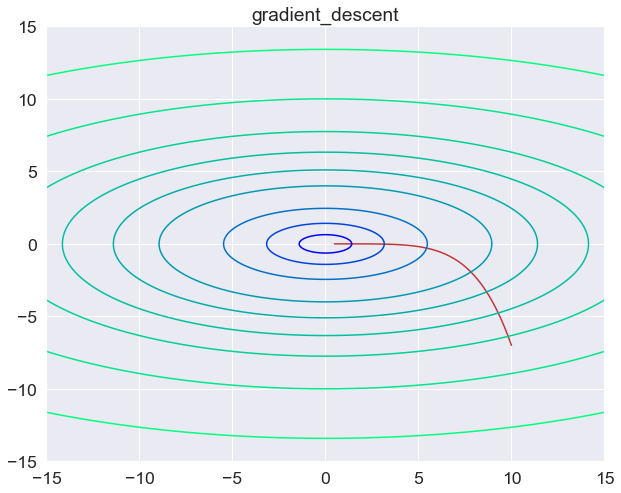

In [7]:
start_point = np.array((10, -7))

# строим траекторию оптимизации
gd_trajectory = gradient_descent(
    # начальное приближение
    start_point, 
    # функция вычисления градиента
    square_sum_grad,
    # скорость обучения
    0.01 
)

# визуализируем эксперимент
make_experiment(square_sum, gd_trajectory, 'gradient_descent')

MovieWriter imagemagick unavailable; using Pillow instead.


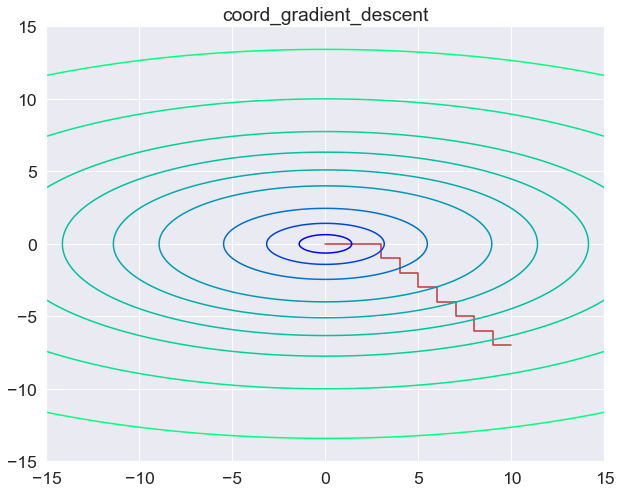

In [8]:
start_point = np.array((10, -7)) # начальное приближение

# строим траекторию оптимизации
coord_gd_trajectory = coord_descent(
    # начальное приближение
    start_point, 
    # функция вычисления градиента
    square_sum_grad, 
    # скорость обучения
    0.01, 
    # число итераций
    30
)

# визуализируем эксперимент
make_experiment(square_sum, coord_gd_trajectory, 'coord_gradient_descent')

MovieWriter imagemagick unavailable; using Pillow instead.


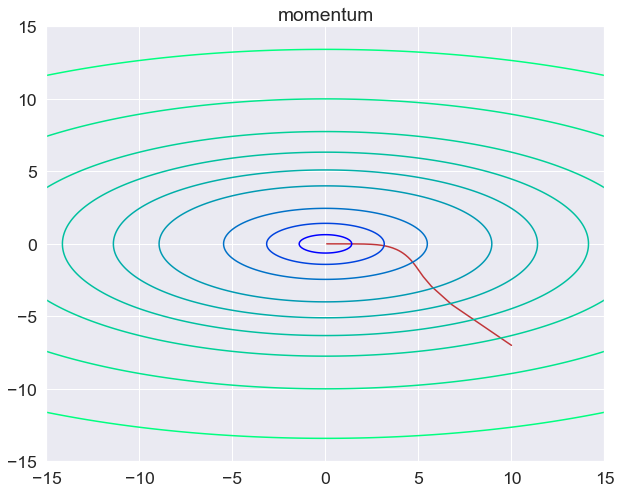

In [9]:
start_point = np.array((10, -7)) # начальное приближение

# строим траекторию оптимизации
momentum_trajectory = momentum(
    # начальное приближение
    start_point, 
    # функция вычисления градиента
    square_sum_grad, 
    # скорость обучения
    0.01, 
    # коэффициент инерции
    0.3
)

# визуализируем эксперимент
make_experiment(square_sum, momentum_trajectory, 'momentum')

MovieWriter imagemagick unavailable; using Pillow instead.


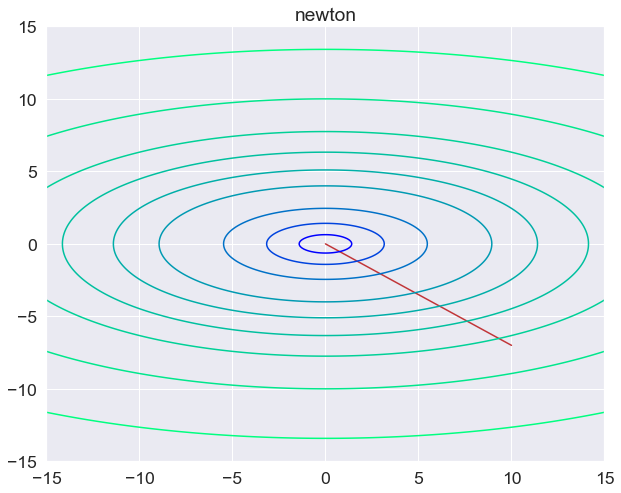

In [10]:
start_point = np.array((10, -7)) # начальное приближение

# строим траекторию оптимизации
newton_trajectory = newton(
    # начальное приближение
    start_point, 
    # функция вычисления градиента
    square_sum_grad, 
    # функция вычисления гессиана
    square_sum_hessian, 
    # скорость обучения
    0.1
)

# визуализируем эксперимент
make_experiment(square_sum, newton_trajectory, 'newton')